# Visual Debugging

Sometimes it's hard to understand what's happening when working with PDFs. Natural PDF provides powerful visual debugging tools to help you see what you're extracting.

## Quick Visualization with `.show()`

The **fastest** way to see what you have selected is to call `.show()` on the element (or collection/region) that you receive.  
Unlike `.highlight()` this does **not** persist anything on the page – it simply returns a `PIL.Image` with temporary highlights that you can display right away.

CropBox missing from /Page, defaulting to MediaBox


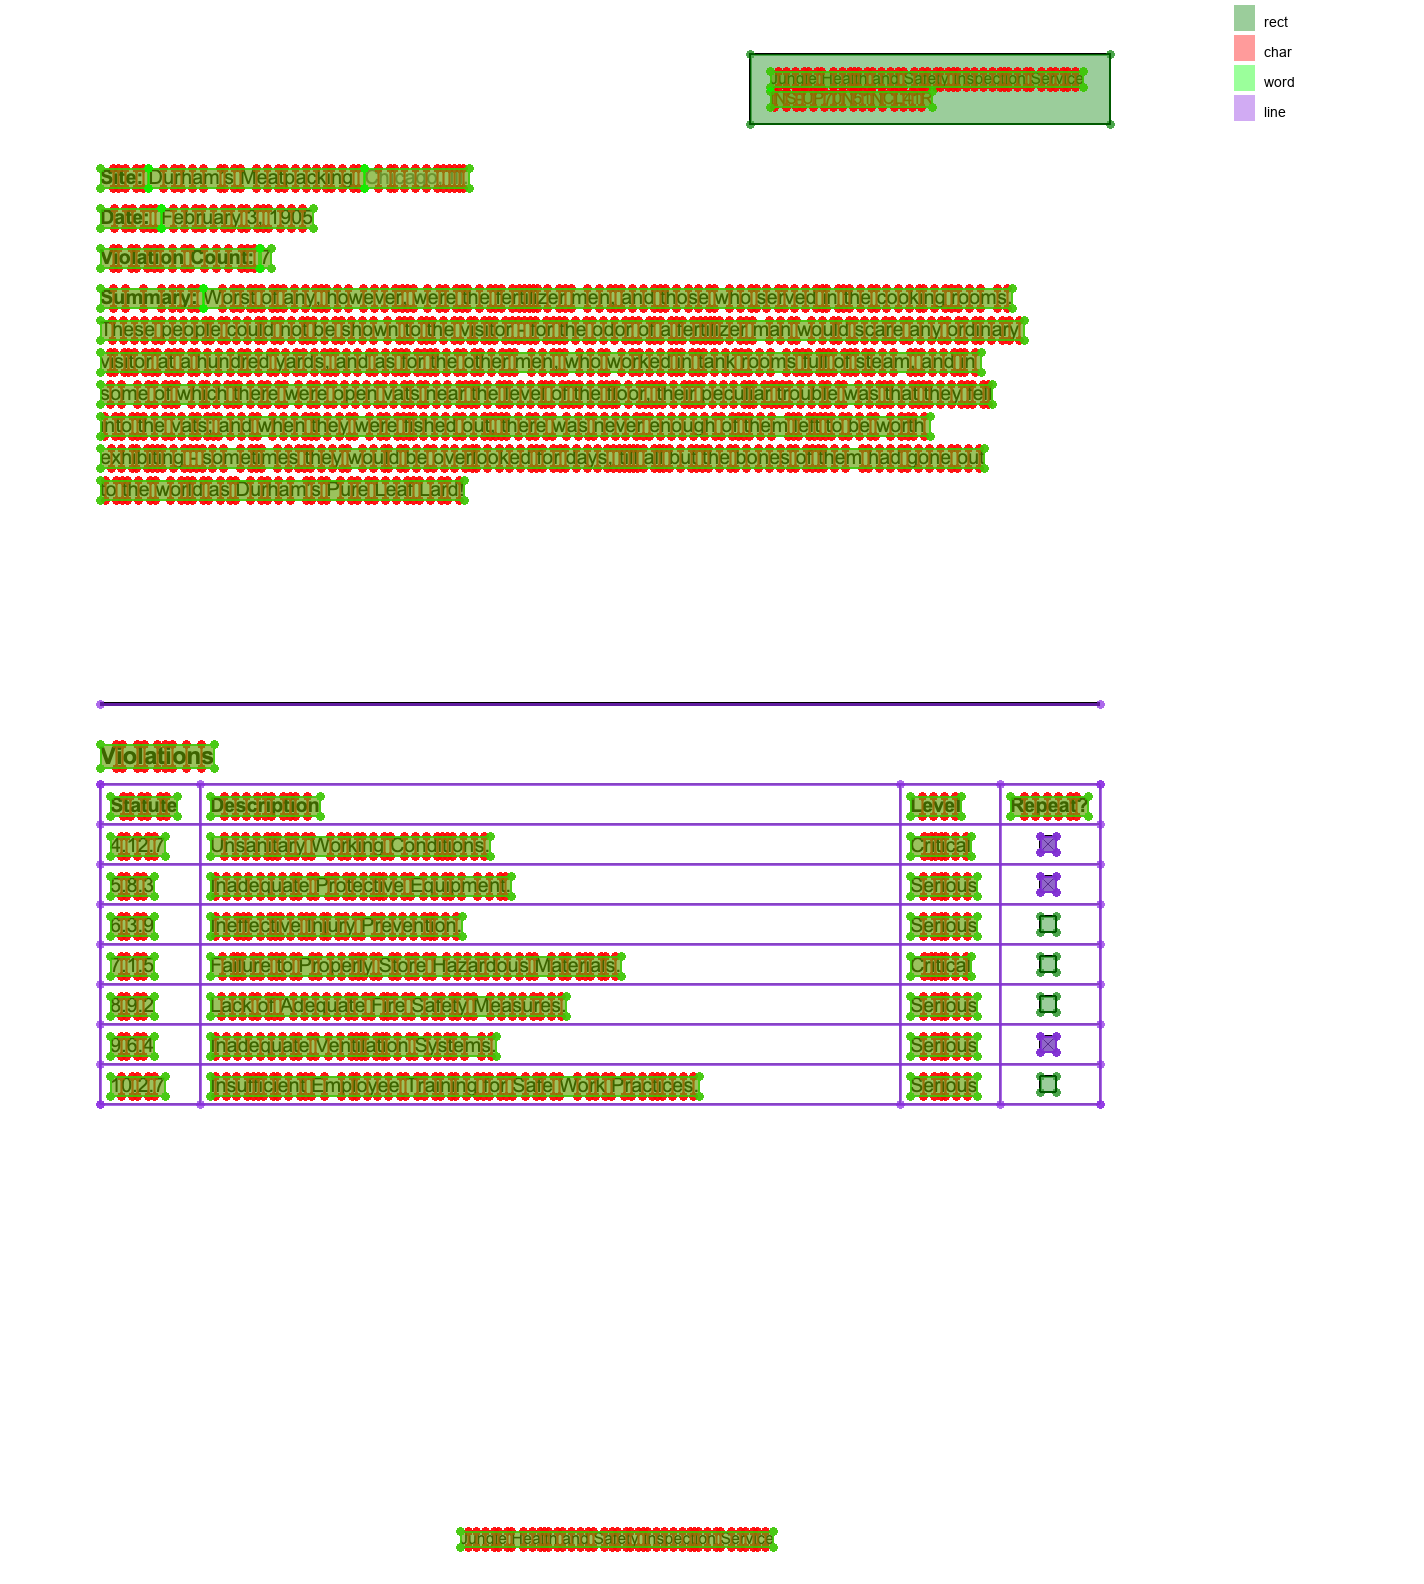

In [1]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

# View a few elements that contain the word "Summary"
page.find_all('text:contains("Summary")').show()

# Crop-only display of the region below the heading
heading = page.find('text:bold[size>=12]')
region_below = heading.below(height=250)
region_below.show(crop=True)

# Colour by element type
page.find_all('text, rect, line').show(group_by='type')

Need a prettier image for an article or report? `.show()` accepts the same keyword arguments as `.highlight()` (`color`, `label`, `group_by`, `include_attrs`, …) so you can style the output exactly the way you like without leaving any permanent marks on the page.

**Tip – `crop=True`**  

Pass `crop=True` to `.show()` (or `.to_image()`) when you want the *smallest* image that still contains all of the selected elements/region.  
This works for both `Region` objects and regular `ElementCollection`s – perfect for quickly zooming into the exact area you're debugging.

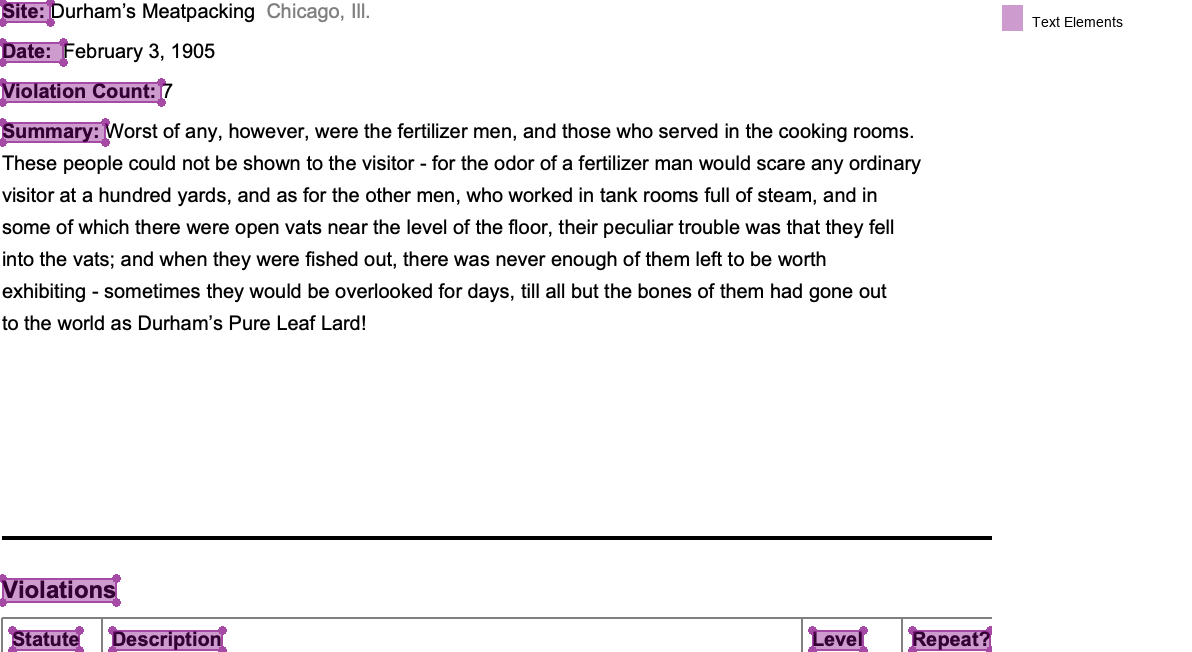

In [2]:
# Zoom into just the bold text you found
page.find_all('text:bold').show(crop=True)

## Adding Persistent Highlights

Use the `.highlight()` method on `Element` or `ElementCollection` objects to add persistent highlights to a page. These highlights are stored and will appear when viewing the page later.

CropBox missing from /Page, defaulting to MediaBox


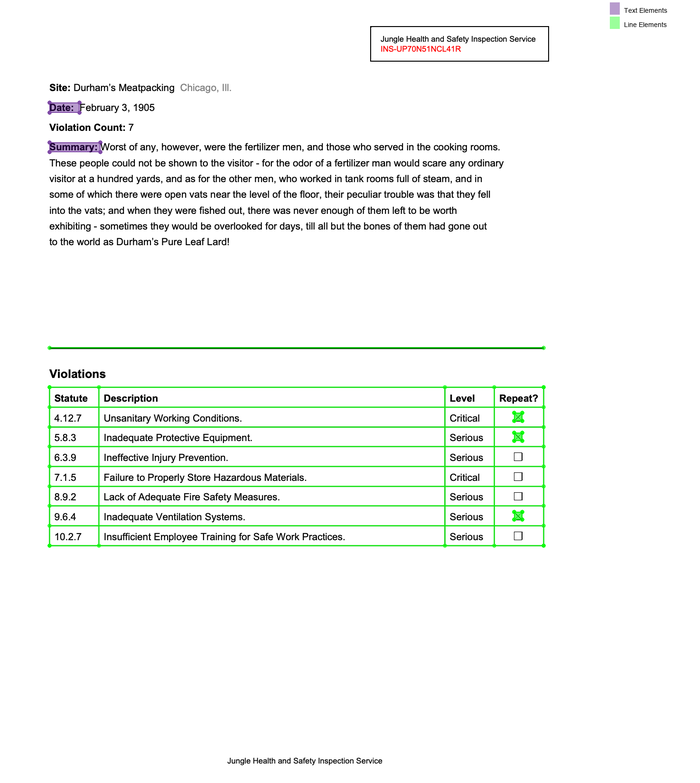

In [3]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

# Find a specific element and add a persistent highlight
page.find_all('text:contains("Summary")').highlight()
page.find_all('text:contains("Date")').highlight()
page.find_all('line').highlight()
page.to_image(width=700)

## Customizing Persistent Highlights

Customize the appearance of persistent highlights added with `.highlight()`:

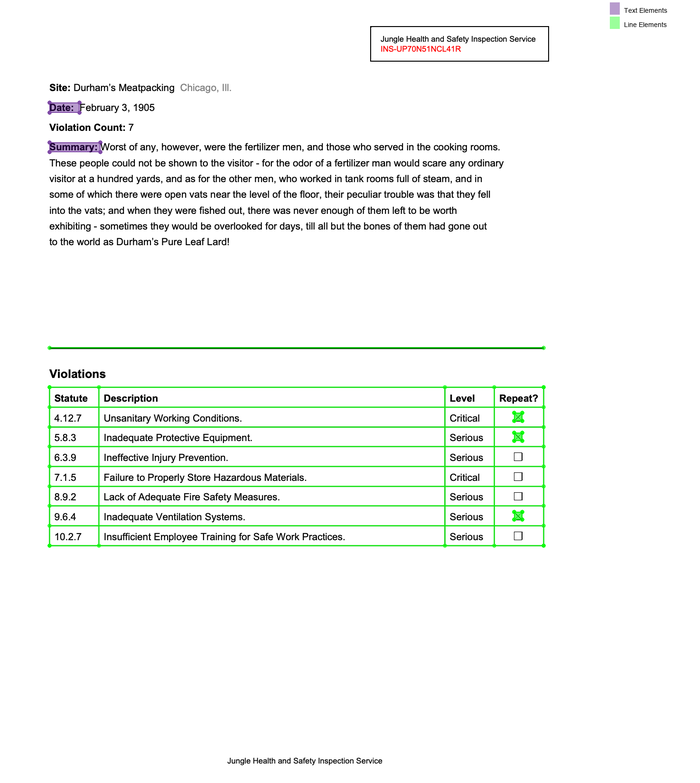

In [4]:
page.clear_highlights()

title = page.find('text:bold[size>=12]')

# Highlight with a specific color (string name, hex, or RGB/RGBA tuple)
# title.highlight(color=(1, 0, 0, 0.3))  # Red with 30% opacity
# title.highlight(color="#FF0000")        # Hex color
title.highlight(color="red")           # Color name

text = page.find('text:contains("Critical")')

# Add a label to the highlight (appears in legend)
text.highlight(label="Critical")

# Combine color and label
rect = page.find('rect')
rect.highlight(color=(0, 0, 1, 0.2), label="Box")

page.to_image(width=700)

## Highlighting Multiple Elements

Highlighting an `ElementCollection` applies the highlight to all elements within it. By default, all elements in the collection get the same color and a label based on their type.


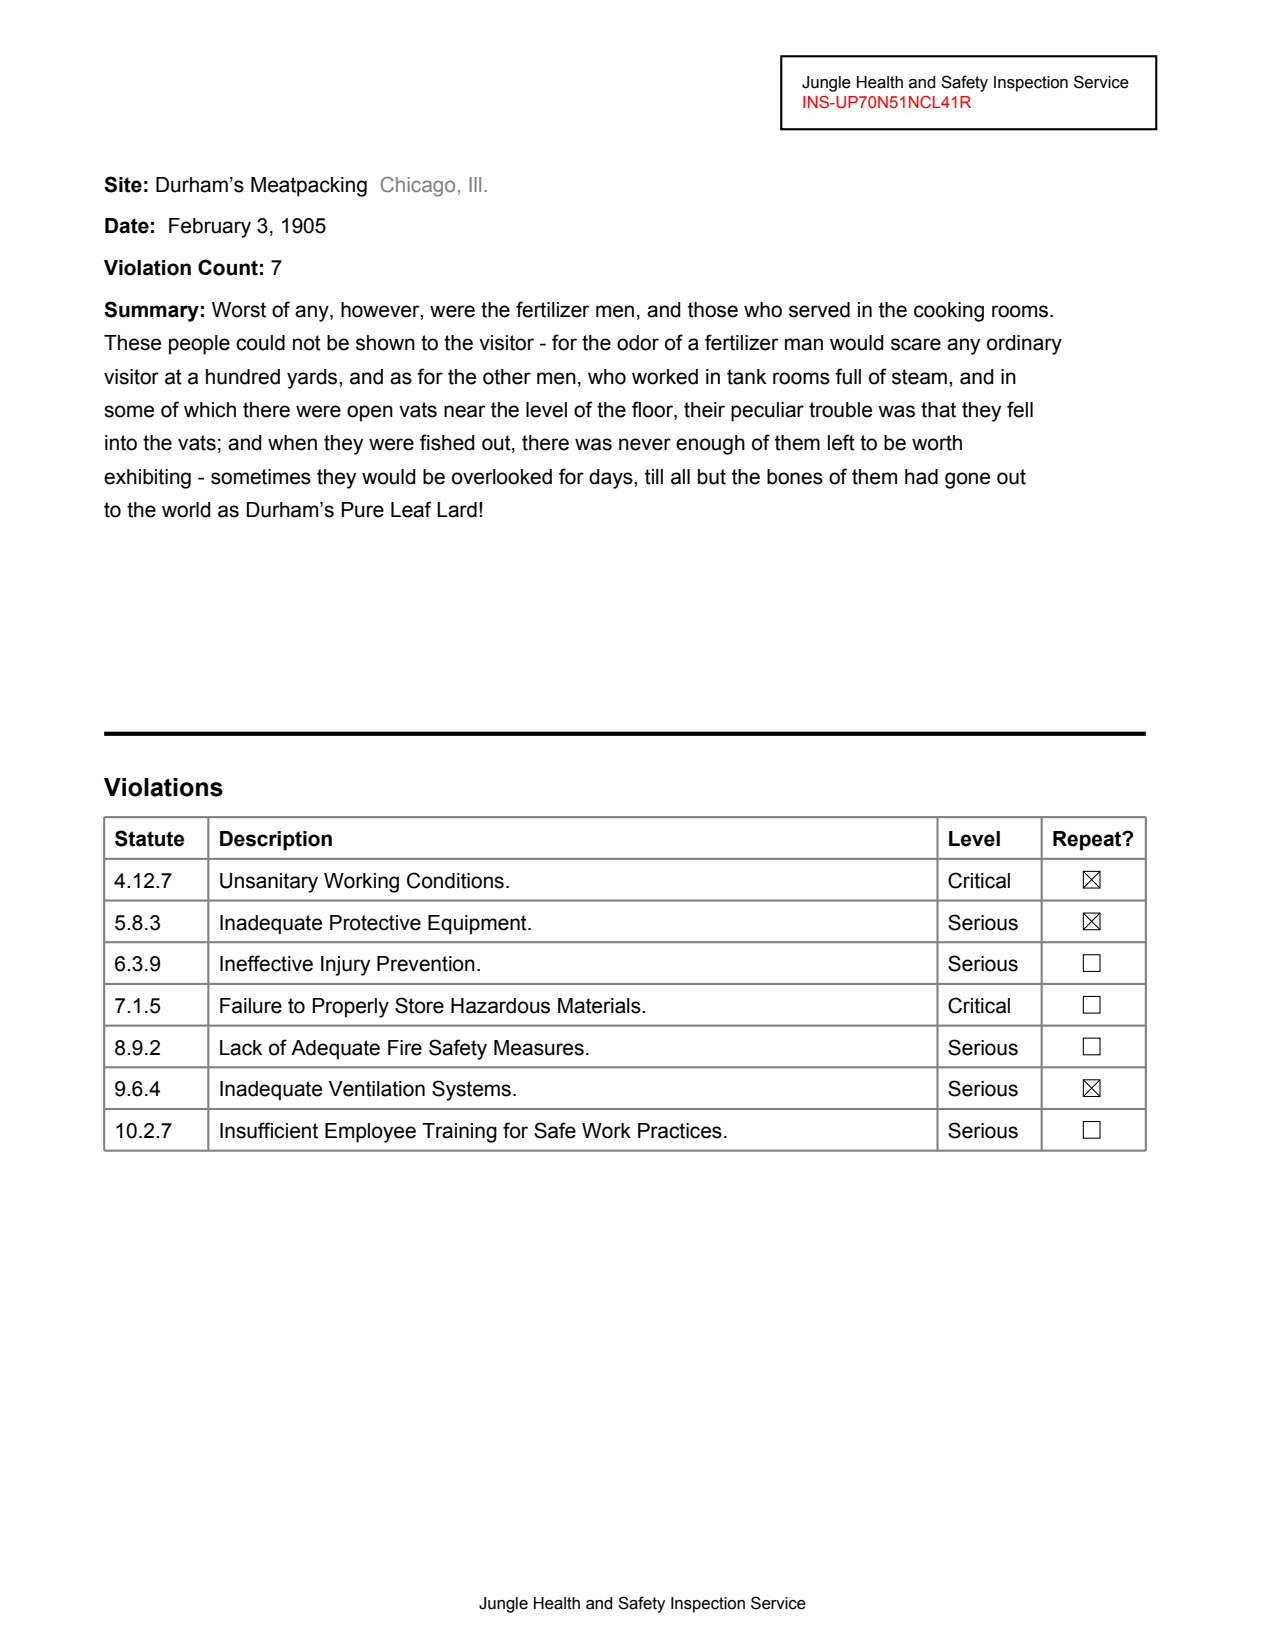

<IPython.core.display.Javascript object>

InteractiveViewerWidget()

In [5]:
# Find and highlight all headings with a single color/label
headings = page.find_all('text[size>=14]:bold')
headings.highlight(color=(0, 0.5, 0, 0.3), label="Headings")

# Find and highlight all tables
tables = page.find_all('region[type=table]')
tables.highlight(color=(0, 0, 1, 0.2), label="Tables")

# View the result
page.viewer()

## Viewing Regions

You can visualise regions to see the exact area you're working with:

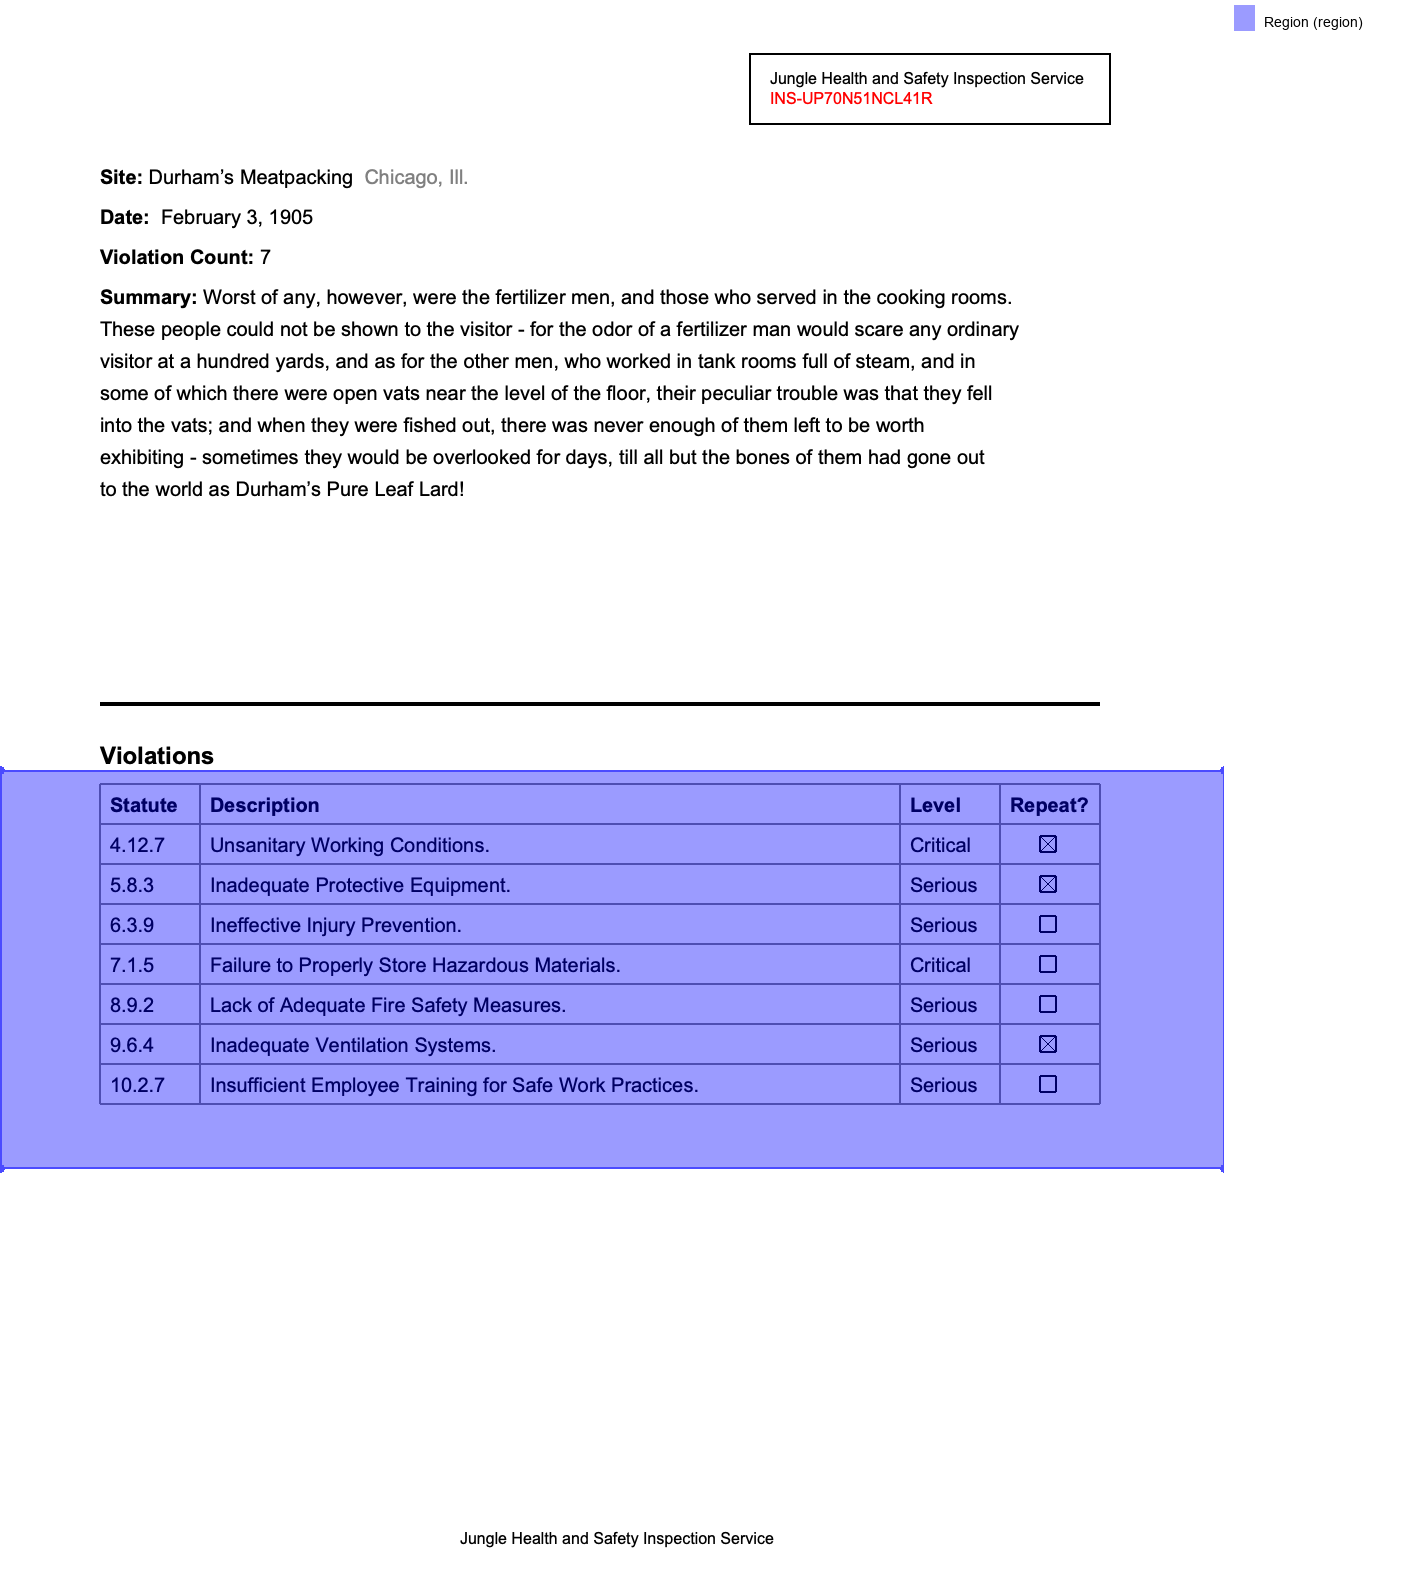

In [6]:
# Find a title and create a region below it
title = page.find('text:contains("Violations")')
content = title.below(height=200)

# Highlight the region
content.show()

Or look at just the region by itself

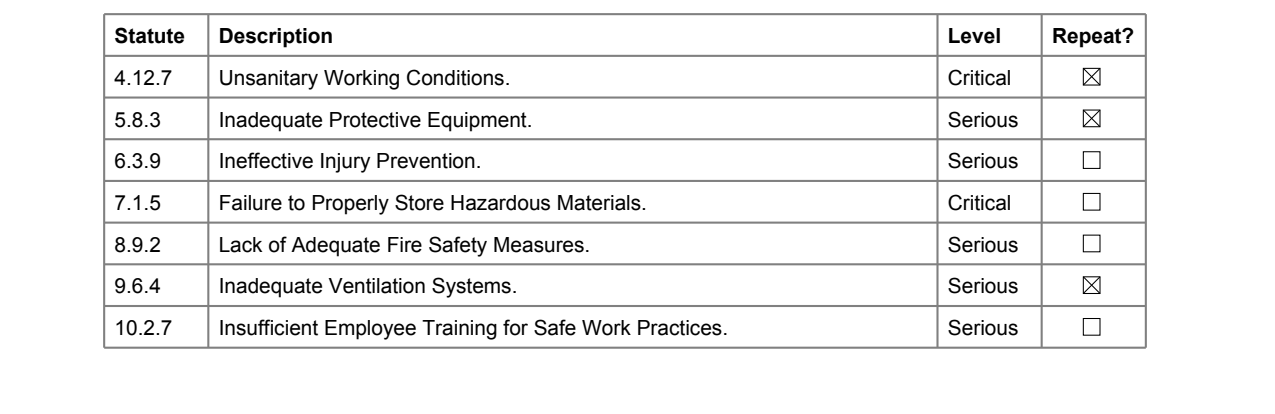

In [7]:
# Find a title and create a region below it
title = page.find('text:contains("Violations")')
content = title.below(height=200)

# Crop to the region
content.to_image(crop=True, include_highlights=False)

## Working with Text Styles

Visualize text styles to understand the document structure:

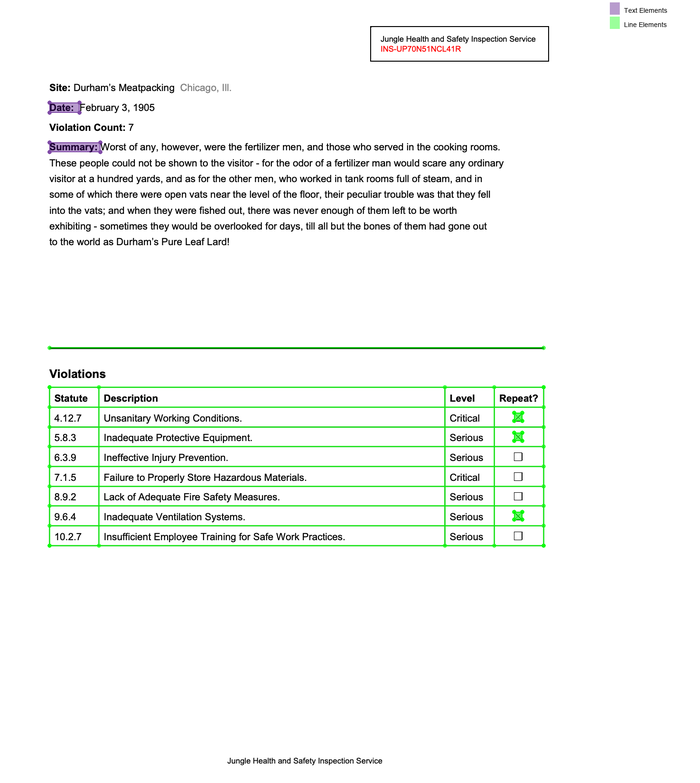

In [8]:
# Analyze and visualize text styles
page.clear_highlights()

page.analyze_text_styles()
page.find_all('text').show(group_by='style_label')

page.to_image(width=700)

## Displaying Attributes

You can display element attributes directly on the highlights:

CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


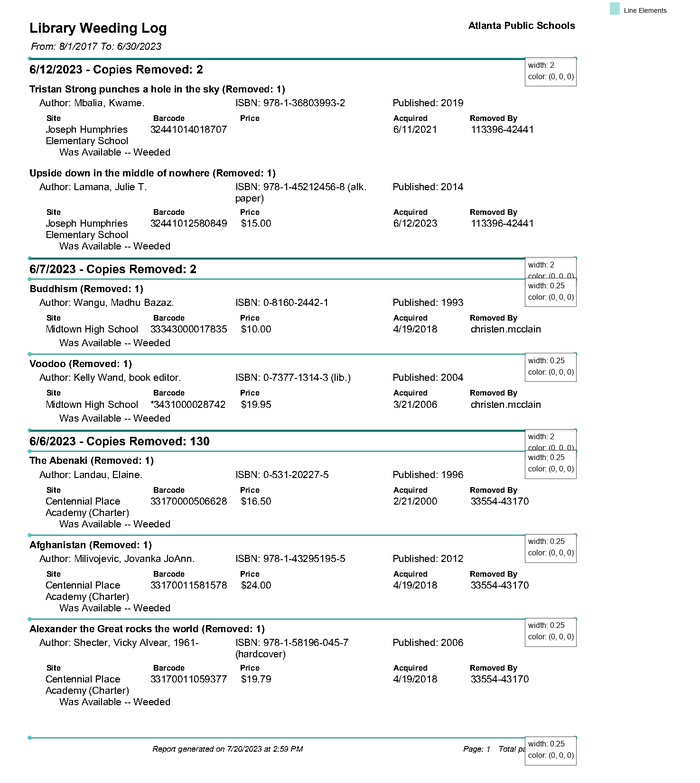

In [9]:
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/Atlanta_Public_Schools_GA_sample.pdf")
page = pdf.pages[0]

text = page.find_all('line')
text.highlight(include_attrs=['width', 'color'])

page.to_image(width=700)

Does it get busy? YES.

## Clearing Highlights

You can clear persistent highlights from a page:


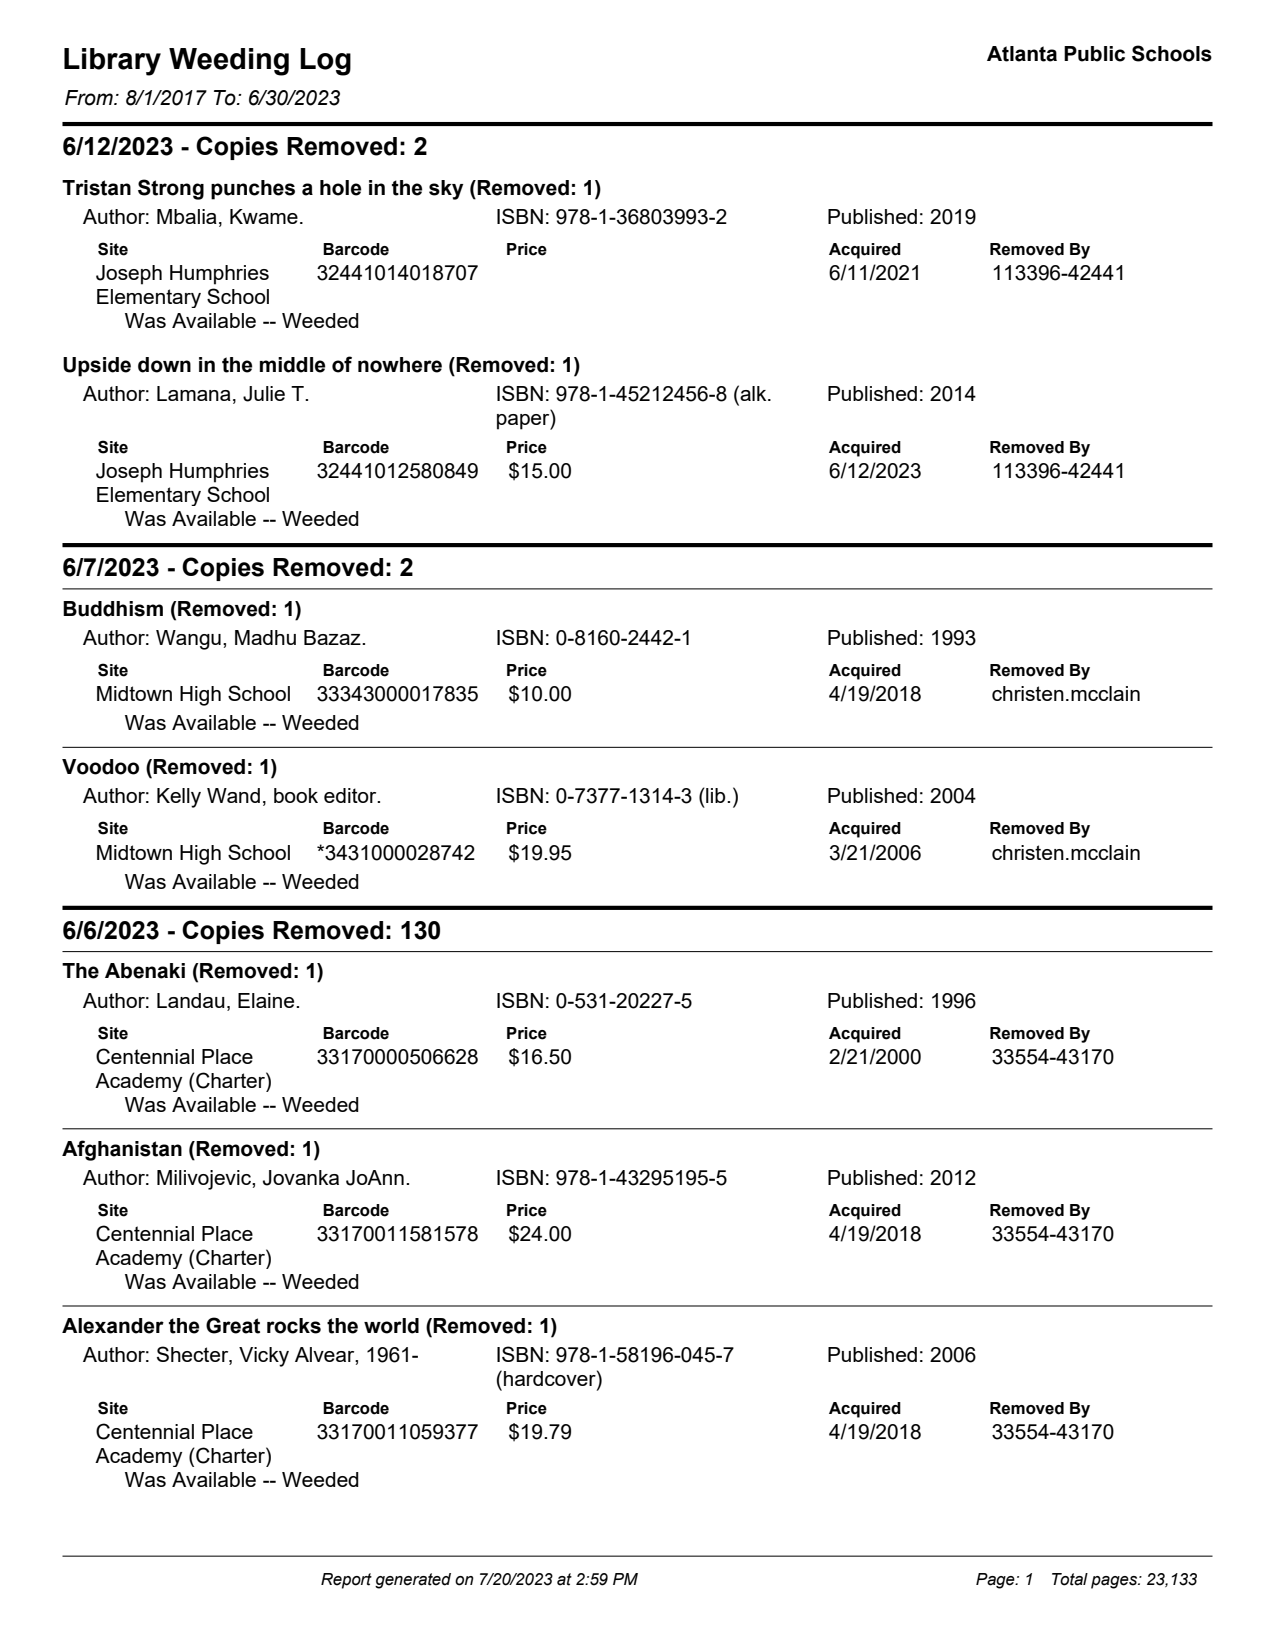

<IPython.core.display.Javascript object>

InteractiveViewerWidget()

In [10]:
# Clear all highlights on the page
page.clear_highlights()

# Apply new highlights
page.find_all('text:bold').highlight(label="Bold Text")
page.viewer()

## Document QA Visualization

Visualize document QA results:

CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


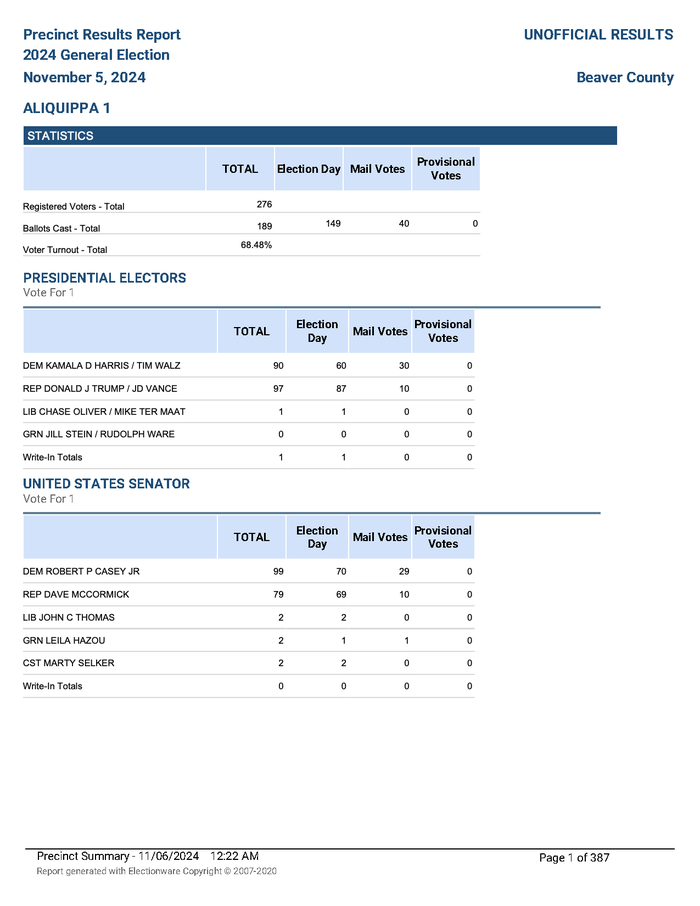

In [11]:
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/0500000US42007.pdf")
page = pdf.pages[0]
page.to_image(width=700)

In [12]:
response = page.ask("How many votes did Kamala Harris get on Election Day?")
response

Device set to use mps:0


{'answer': '60',
 'confidence': 0.31857365369796753,
 'start': 31,
 'end': 31,
 'found': True,
 'page_num': 0,
 'source_elements': <ElementCollection[TextElement](count=1)>}

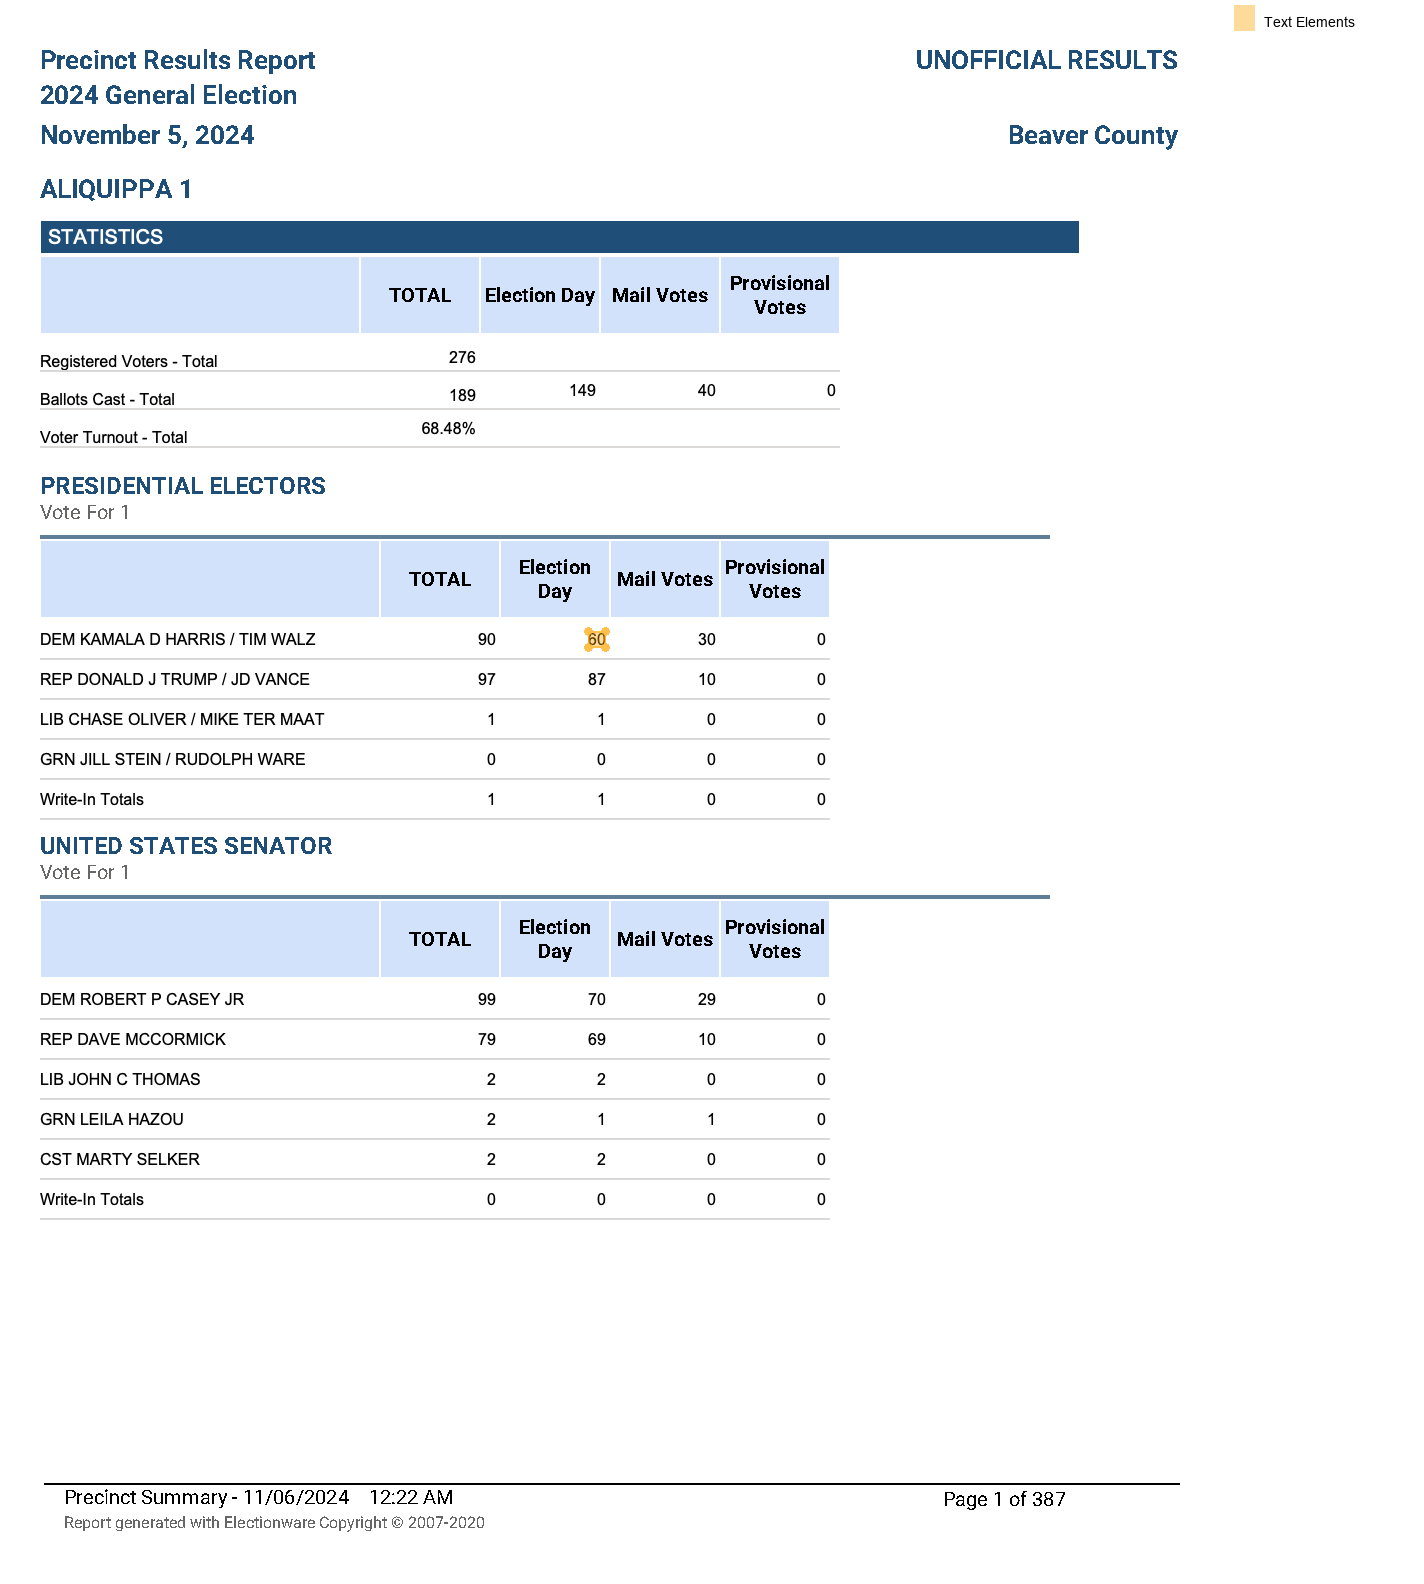

In [13]:
response['source_elements'].show()

## Next Steps

Now that you know how to visualize PDF content, you might want to explore:

- [OCR capabilities](../ocr/index.md) for working with scanned documents
- [Layout analysis](../layout-analysis/index.ipynb) for automatic structure detection
- [Document QA](../document-qa/index.ipynb) for asking questions directly to your documents